In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from numpy.random import randn
sns.set_style('whitegrid')
import pandas_datareader as pdweb
import datetime
import scipy.stats as stats


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import cufflinks as cf
cf.go_offline()

In [6]:
import pandas_datareader as pdweb
import datetime
start = datetime.datetime (2019, 1,1)
end =datetime.datetime (2020, 1,1)

In [5]:
HDFC = pdweb.get_data_yahoo('HDFCBANK.NS', start, end)
YESBANK = pdweb.get_data_yahoo('YESBANK.NS', start, end)
KOTAK = pdweb.get_data_yahoo('KOTAKBANK.NS', start, end)
AXIS = pdweb.get_data_yahoo ('AXISBANK.NS', start, end)
BOB = pdweb.get_data_yahoo ('BANKBARODA.NS', start, end)
FEDERAL = pdweb.get_data_yahoo ('FEDERALBNK.NS', start, end)
ICICI = pdweb.get_data_yahoo ('ICICIBANK.NS', start, end)
IDFC = pdweb.get_data_yahoo ('IDFCFIRSTB.NS', start, end)
INDUSIND = pdweb.get_data_yahoo ('INDUSINDBK.NS', start, end)
RBL = pdweb.get_data_yahoo ('RBLBANK.NS', start, end)
PNB = pdweb.get_data_yahoo ('PNB.NS', start, end)
SBI = pdweb.get_data_yahoo('SBIN.NS', start, end)

In [13]:
bank_list  = ['HDFC', 'YESBANK', 'KOTAK', 'AXIS', 'FEDERAL', 'BOB', 'ICICI', 'INDUSIND', 'RBL', 'PNB', 'SBI', 'IDFC']
bank_list = pd.concat([ HDFC, YESBANK, KOTAK, AXIS, FEDERAL, BOB, ICICI, INDUSIND, RBL, PNB, SBI, IDFC], axis=1, keys = bank_list)
bank_list.head()

HDFC                                                    \
                   High          Low         Open        Close     Volume   
Date                                                                        
2019-01-01  1075.500000  1052.800049  1063.819946  1074.050049  3186720.0   
2019-01-02  1073.750000  1059.849976  1071.400024  1064.250000  4067116.0   
2019-01-03  1064.119995  1051.500000  1062.099976  1055.900024  6385832.0   
2019-01-04  1064.250000  1055.180054  1057.619995  1058.719971  3643560.0   
2019-01-07  1067.680054  1059.000000  1063.849976  1060.319946  2693506.0   

                                         YESBANK                          ...  \
              Adj Close Daily Return        High         Low        Open  ...   
Date                                                                      ...   
2019-01-01  1056.070068          NaN  185.899994  181.000000  182.600006  ...   
2019-01-02  1046.434082     0.002171  187.000000  182.500000  183.449997  ...   
2019-01-03  1038.223877    -0.002979  186.000000  183.500000  185.250000  ...   
2019-01-04  1040.996582     0.030147  190.300003  181.550003  184.850006  ...   
2019-01-07  1042.569824    -0.013182  194.399994  185.800003  193.899994  ...   

                   SBI                                           IDFC  \
                  Open       Close      Volume   Adj Close       High   
Date                                                                    
2019-01-01  297.500000  299.600006  11837127.0  299.600006  43.549999   
2019-01-02  299.100006  293.899994  25559853.0  293.899994  43.599998   
2019-01-03  295.000000  291.100006  17548347.0  291.100006  43.400002   
2019-01-04  292.100006  297.649994  19514041.0  297.649994  45.549999   
2019-01-07  301.049988  296.299988  14579399.0  296.299988  47.450001   

                                                                    
                  Low       Open      Close      Volume  Adj Close  
Date                                                                
2019-01-01  43.099998  43.400002  43.349998   5377735.0  43.349998  
2019-01-02  42.200001  43.200001  42.700001  11044098.0  42.700001  
2019-01-03  42.400002  42.650002  43.049999   9264868.0  43.049999  
2019-01-04  42.849998  43.099998  45.150002  15503296.0  45.150002  
2019-01-07  45.500000  46.000000  46.150002  32354449.0  46.150002  

[5 rows x 73 columns]

In [15]:
#We will be trying to demonstrate the moving averages along with daily returns for HDFC Bank

HDFC.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-01-01,1075.500000,1052.800049,1063.819946,1074.050049,3186720.0,1056.070068,NaN
2019-01-02,1073.750000,1059.849976,1071.400024,1064.250000,4067116.0,1046.434082,0.002171
2019-01-03,1064.119995,1051.500000,1062.099976,1055.900024,6385832.0,1038.223877,-0.002979
2019-01-04,1064.250000,1055.180054,1057.619995,1058.719971,3643560.0,1040.996582,0.030147
2019-01-07,1067.680054,1059.000000,1063.849976,1060.319946,2693506.0,1042.569824,-0.013182


In [8]:
#Moving Averages
#The index having 10, 20 and 55 denoted 10 day moving average along with 20 and 55 day

In [9]:
HDFC['Close'].ix['2019-01-01': '2020-01-01'].ta_plot(study = 'sma', periods= [10,20, 55])

/Users/p18shaship/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



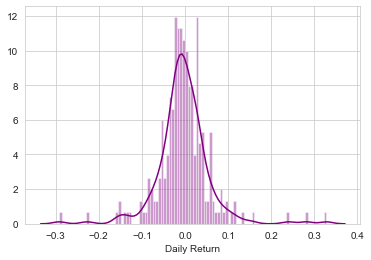

In [10]:
HDFC['Daily Return']= YESBANK['Adj Close'].pct_change()
sns.distplot(HDFC['Daily Return'].dropna(), bins=100, color = 'purple')

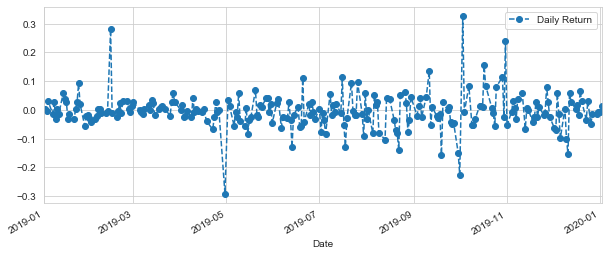

In [11]:
HDFC['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

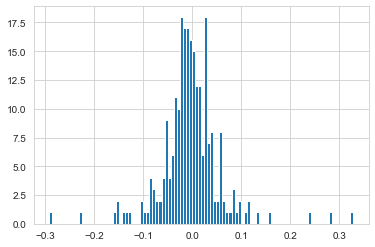

In [17]:
HDFC['Daily Return'].hist(bins=100)

In [18]:
bank_list.columns.names =['Bank Ticker', 'Stock info']
#tech_stocks.xs(key='Close',axis=1, level = 'Stock info').corr()
bank_list.xs(key= 'Close', axis = 1, level = 'Stock info').corr()

Bank Ticker,HDFC,YESBANK,KOTAK,AXIS,FEDERAL,BOB,ICICI,INDUSIND,RBL,PNB,SBI,IDFC
Bank Ticker,,,,,,,,,,,,
HDFC,1.000000,-0.624316,0.889993,0.524026,0.225159,-0.167836,0.876488,-0.147988,-0.367369,-0.349963,0.526857,-0.299289
YESBANK,-0.624316,1.000000,-0.845908,0.148179,0.204155,0.661087,-0.679105,0.751339,0.798612,0.862174,-0.100535,0.797873
KOTAK,0.889993,-0.845908,1.000000,0.225708,-0.033754,-0.447538,0.888725,-0.399240,-0.646918,-0.640496,0.325209,-0.519695
AXIS,0.524026,0.148179,0.225708,1.000000,0.681181,0.559926,0.288510,0.440716,0.489827,0.432542,0.733483,0.251273
FEDERAL,0.225159,0.204155,-0.033754,0.681181,1.000000,0.798524,-0.064188,0.397370,0.694220,0.590750,0.748297,0.165832
BOB,-0.167836,0.661087,-0.447538,0.559926,0.798524,1.000000,-0.326841,0.750861,0.887977,0.890197,0.577552,0.585274
ICICI,0.876488,-0.679105,0.888725,0.288510,-0.064188,-0.326841,1.000000,-0.175133,-0.572576,-0.506757,0.433488,-0.279940
INDUSIND,-0.147988,0.751339,-0.399240,0.440716,0.397370,0.750861,-0.175133,1.000000,0.688081,0.794779,0.306286,0.845222
RBL,-0.367369,0.798612,-0.646918,0.489827,0.694220,0.887977,-0.572576,0.688081,1.000000,0.917975,0.339576,0.590692


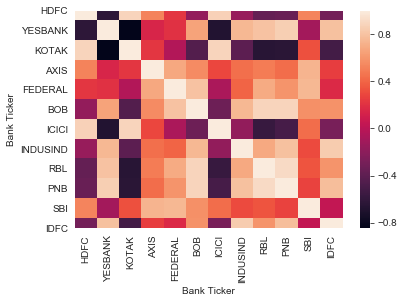

In [19]:
#sns.heatmap(tech_stocks.xs(key='Close',axis=1, level = 'Stock info').corr())

sns.heatmap(bank_list.xs(key= 'Close', axis = 1, level = 'Stock info').corr())

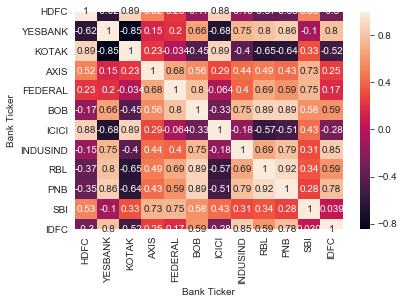

In [20]:
sns.heatmap(bank_list.xs(key= 'Close', axis = 1, level = 'Stock info').corr(), annot=True)

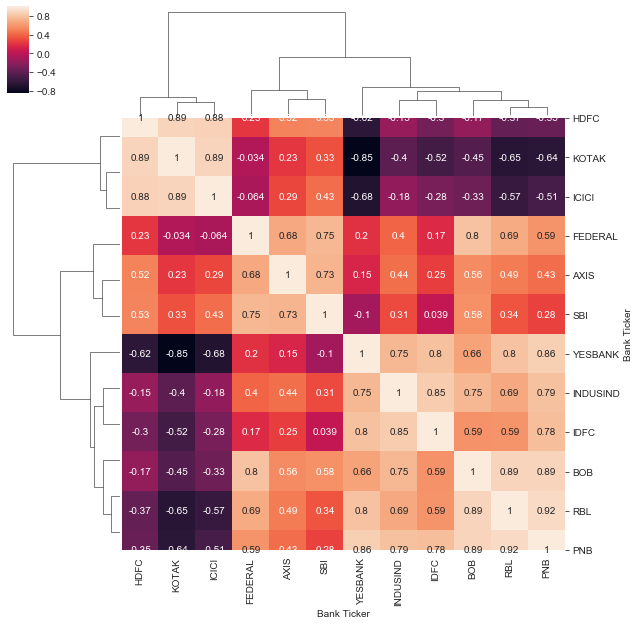

In [21]:
sns.clustermap(bank_list.xs(key= 'Close', axis = 1, level = 'Stock info').corr(), annot=True)

In [22]:


Close_corr = bank_list.xs(key = 'Close', axis = 1, level = 'Stock info').corr()

In [23]:
Close_corr.iplot(kind='heatmap')

In [24]:
Close_corr.iplot(kind='heatmap', colorscale = 'rdylbu')